In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests 
from bs4 import BeautifulSoup as bs
import os
os.chdir(r'C:\Users\Nate P\Desktop\Rotten Tomatoes Movies Analysis\Disney Vs US Box Office')
import datetime
import matplotlib.dates as Date

In [2]:
# Functions to help with project

def scrape_distributor_data(distributer_name):
    """Function scrapes distributer data from 'the-numbers' website. Input is distributer name, which will be formated correctly 
    with the url. Return is dataframe of 8 columns."""
    
    distributer_url = 'https://www.the-numbers.com/market/distributor/{}'.format(distributer_name.replace(' ','-'))
    distributer_requests = requests.get(distributer_url).text
    distributer_soup = bs(distributer_requests)
    # Multiple tables on url. Select second one
    distributer_table = distributer_soup.findAll('table')[1] 
    # Extract data
    distributer_data = [[td.text for td in tr.findAll('td')] for tr in distributer_table.findAll('tr')[1:]]
    distributer_df = pd.DataFrame(distributer_data)
   
    # Column names are uniform. Cannot scrape column names due to issue with website
    distributer_df.columns = ['Year','Movies in Release','Market Share','Gross','Tickets Sold','Inflation-Adjusted Gross','Top-Grossing Movie',
                    'Top Movie Gross']
    
    return distributer_df


def clean_market_share(percentage):
    """ Market Share is in a percentage, but reads as a string. Need to convert to int for matplotlib to handle properly"""
    """Tested and function works"""
    return float(percentage.strip('%'))
def convert_to_datetime(year):
    """Convert the dates to datetime"""
    return datetime.date(int(year), 1, 1)

disney_df['Year'].apply(convert_to_date_time)

NameError: name 'disney_df' is not defined

In [3]:
# Load in Disney df. Not saved to csv. Scrape. 
disney_df = scrape_distributor_data('Walt Disney')

In [13]:
# Save Disney df. 
disney_df.to_csv('disney_df.csv', index = False)

In [4]:
# Read in .csv files into DF
sony_df = pd.read_csv('sony_df.csv')
tcentury_fox_df = pd.read_csv('twentieth_century_fox_df.csv')
universal_df = pd.read_csv('universal_df.csv')
warner_bros_df = pd.read_csv('warner_bros_df.csv')


In [5]:
# Placing df in a list
df_list = [disney_df, sony_df, tcentury_fox_df,universal_df,warner_bros_df]

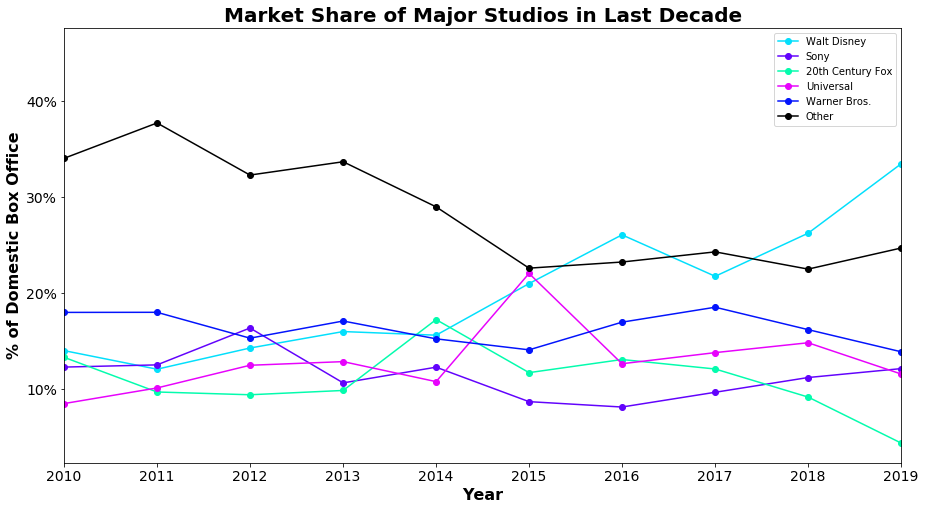

In [8]:
# Reconstruct "Disney rising market share" graph. Use data from other studios in conjuncture 
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.set_xlabel('Year', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('% of Domestic Box Office', fontsize = 16, fontweight = 'bold')
ax.set_yticklabels(['0%', '10%','20%','30%','40%'], fontsize = 14)
ax.set_xticklabels(labels = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'], fontsize = 14)
ax.set_xlim(Date.date2num(datetime.date(2010,1,1)), Date.date2num(datetime.date(2019,1,1)))
ax.plot(disney_df['Year'].apply(convert_to_datetime), disney_df['Market Share'].apply(clean_market_share), marker = 'o',
                    label = 'Walt Disney', color = '#03dffc')
ax.plot(sony_df['Year'].apply(convert_to_datetime), sony_df['Market Share'].apply(clean_market_share), marker = 'o', 
                        label = 'Sony', color = '#6203fc')
ax.plot(tcentury_fox_df['Year'].apply(convert_to_datetime), tcentury_fox_df['Market Share'].apply(clean_market_share), marker = 'o',
           label = '20th Century Fox', color = '#03fcad')
ax.plot(universal_df['Year'].apply(convert_to_datetime), universal_df['Market Share'].apply(clean_market_share),
       marker = 'o', label = 'Universal', color = '#e703fc')
ax.plot(warner_bros_df['Year'].apply(convert_to_datetime), warner_bros_df['Market Share'].apply(clean_market_share),
       marker = 'o', label = 'Warner Bros.', color = '#0314fc')
ax.plot(disney_df['Year'].apply(convert_to_datetime), market_share_other, marker = 'o', label = 'Other',color = 'black')
ax.set_title('Market Share of Major Studios in Last Decade', fontsize = 20, fontweight = 'bold')

#ax.set_xticks(['2010','2015', '2019'])
#ax.set_xticklabels(['2010','2015', '2019'])
ax.legend()
plt.show()
fig.savefig('Market Share of Major Studios.png')

In [9]:
# What if want to add "Other"? That way it adds to 100%
market_share_other = 100 - (disney_df['Market Share'].apply(clean_market_share) +
                            sony_df['Market Share'].apply(clean_market_share) +
                            tcentury_fox_df['Market Share'].apply(clean_market_share) +
                            universal_df['Market Share'].apply(clean_market_share) + 
                            warner_bros_df['Market Share'].apply(clean_market_share))






In [10]:
market_share_other + disney_df['Market Share'].apply(clean_market_share)

0     50.58
1     52.57
2     49.69
3     61.99
4     53.45
5     55.22
6     54.81
7     51.02
8     53.62
9     52.78
10    47.42
11    45.84
12    50.59
13    46.92
14    44.20
15    48.04
16    49.79
17    46.56
18    49.67
19    44.58
20    43.57
21    49.30
22    46.03
23    48.73
24    58.17
25    28.98
Name: Market Share, dtype: float64

In [11]:
market_share_test = (market_share_other + disney_df['Market Share'].apply(clean_market_share) +
                            sony_df['Market Share'].apply(clean_market_share) +
                            tcentury_fox_df['Market Share'].apply(clean_market_share) +
                            universal_df['Market Share'].apply(clean_market_share) + 
                            warner_bros_df['Market Share'].apply(clean_market_share))

In [12]:
market_share_test

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
15    100.0
16    100.0
17    100.0
18    100.0
19    100.0
20    100.0
21    100.0
22    100.0
23    100.0
24    100.0
25    100.0
Name: Market Share, dtype: float64